In [1]:
import pandas as pd

spams = pd.read_csv("../dataset/spam.csv", header = 0, encoding = 'ISO-8859-14', sep = ',' )
spams.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
spams.shape

(5572, 5)

In [3]:
spams.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


<AxesSubplot:>

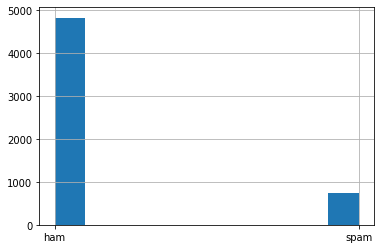

In [4]:
spams['v1'].hist()

In [5]:
spams = spams[['v1', 'v2']] #on recupere les 2 colonnes les plus importantes
spams.columns = ['class', 'text'] #on renomme
spams.head()


,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
from sklearn.feature_extraction.text import  CountVectorizer

# on instancie le converteur de donnees texte de sklearn
data_converter = CountVectorizer()
v = data_converter.fit(spams.text)
# on realise la conversion
spam_convert = data_converter.fit_transform(spams.text)

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

data, labels = spam_convert.toarray(), spams['class'].values
etiquettes = ['ham', 'spam']

labels = np.where(labels == etiquettes[0], 0,1)
labels = np.array(labels, dtype=float)

X_train, X_test, y_train, y_test = train_test_split( data, labels, train_size=0.8, test_size=0.2, stratify= labels)

In [12]:
from libsvm.svmutil import svm_save_model, svm_predict, svm_train, svm_load_model

model_svm = svm_train(y_train, X_train, arg3="-t 1 -d 6 -r 4 ")
svm_save_model("svm_model_spam", model_svm)

.*.*
optimization finished, #iter = 2924
nu = 0.014145
obj = -32.453747, rho = -1.248627
nSV = 613, nBSV = 6
Total nSV = 613


In [13]:
model_svm = svm_load_model("svm_model_spam")
ypred,_,_ = svm_predict(y_test, X_test, model_svm)


Accuracy = 98.0269% (1093/1115) (classification)


In [14]:
def transform_dataframe(mat, etiquettes):
    p = pd.DataFrame(mat , columns = etiquettes)
    p.index = etiquettes
    return p

In [15]:
from sklearn.metrics import confusion_matrix
etiquettes = ['ham', 'spam']

gr = confusion_matrix(y_true= y_test, y_pred= ypred)
transform_dataframe(gr, etiquettes)

,ham,spam
ham,963,3
spam,19,130


`notes`

Le choix de la fonction de noyau a utilisé et de ces parametres est extremment important car influe sur les metriques d'evaluations en bien ou en mal. 

Par experimentaion nous nous sommes rendu compte en fesant le test avec la fonction exponentielle(gaussiene) et la fonction polynomiale qui sont les suivante:
$$polynomiale = (x^Ty + c)^d$$
$$sigmoide = exp(-\gamma * | x - y|^d)$$ 
que la fonction polynomiale etait le plus adapte aux donnees, deplus les parametres de cette fonction a savoir `le coeficient de regulation du produit scalaire des caractteristiques` et `le degre du polynome` influait enormement sur la qualite du modele obtenu.
D'ou la problematique du choix des bons paramttres.

nous avons remarque qu'avec d grand , effectivement on se ramenait vers de tres grand dimention et que pour notre cas de claassifications avec $$d >= 6 \wedge c >=4$$ nous avons un modele qui s'est bien classé les donnees du fait de la matrice de confusion